# 8. 도식화와 시각화 

## 8.1 matplotlib API 간략하게 살펴보기 

ipython --pylab을 이용하여 간편하게 사용할 수 있다. 

In [1]:
%pylab
%gui
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


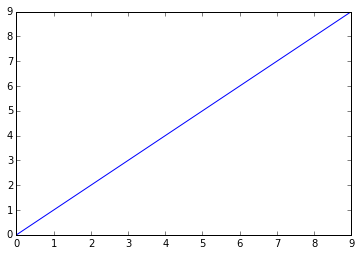

In [2]:
plot(np.arange(10))

###8.1.1 Figure와 서브플롯

In [3]:
import matplotlib.pyplot as plt

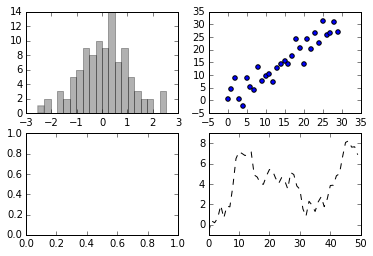

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

from numpy.random import randn
plt.plot(randn(50).cumsum(), 'k--')


_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30)+3*randn(30))

figure() 객체 내에 subplot을 설정 후 각 subplot에 각자 그래프를 그릴 수 있다. 여기서 plt.plot을 이용해면 맨 마지막에 추가한(or index가 가장 높은?) subplot에 그려진다. 


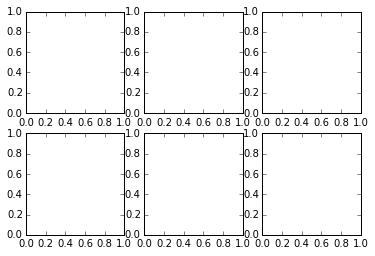

In [5]:
fig, axes = plt.subplots(2,3)

In [8]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x06030290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x06769A90>]], dtype=object)

서브플롯 간 간격 조절하기 

In [6]:
subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = None, hspace = None)

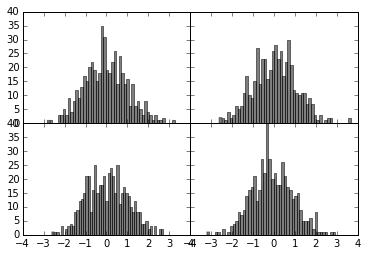

In [7]:
fig, axes = plt.subplots(2,2, sharex = True, sharey = True)
for i in range(2):
    for j in range(2):
            axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace = 0, hspace = 0)

subplot간 간격이 없는 그래프를 생성하는 코드 

###8.1.2 색상, 마커, 선 스타일

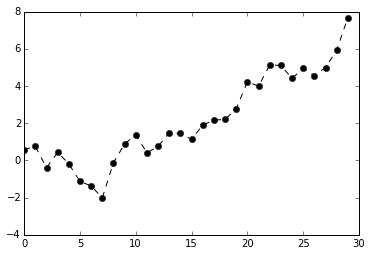

In [8]:
plt.plot(randn(30).cumsum(), 'ko--')

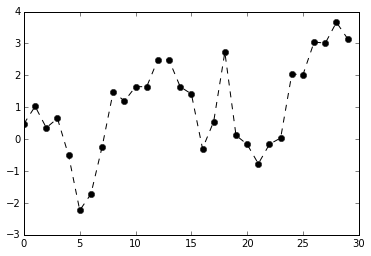

In [9]:
plot(randn(30).cumsum(), color='k', linestyle='dashed', marker = 'o')

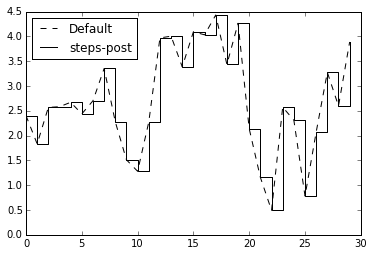

In [10]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle = 'steps-post', label = 'steps-post')
plt.legend(loc='best')

###8.1.3 눈금, 라벨, 범례

#### 제목, 축 이름, 눈금, 눈금 이름 설정하기

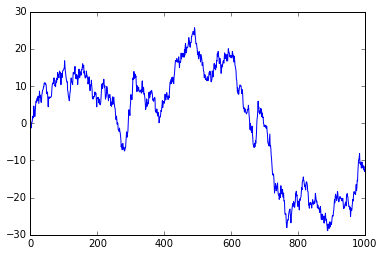

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(randn(1000).cumsum())


In [12]:
ticks = ax.set_xticks([i*250 for i in range(5)])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

ax.set_title('my first plot')

ax.set_xlabel('Stages')

####범례 추가하기 
각 그래프에 label 인자를 넘김으로써 가능하다. 

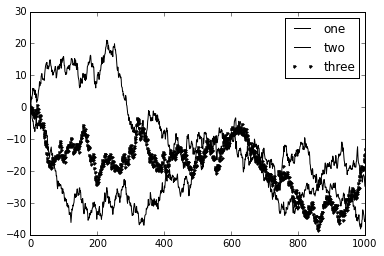

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k', label = 'one')
ax.plot(randn(1000).cumsum(), 'k-', label = 'two')
ax.plot(randn(1000).cumsum(), 'k.', label = 'three')
ax.legend(loc = 'best')

###8.1.4 주석과 그림 추가 
text함수를 이용하여 텍스트를 넣을 수 있다. 주석은 글자와 화살표를 함깨 써서 그릴 수 있다. 다음의 결과를 보자. 

##8.2 pandas에서 그래프 그리기 
지금은 더 나은 툴이 나와 있을 것으로 예상되나, 일단은 책의 예제를 따라갑니다. 

###8.2.1 선 그래프 
Series와 DataFrame 둘 다 plot을 이용해서 그래프를 만들 수 있다. 기본적으로는 plot은 선 그래프를 만든다. 아래 코드를 참조하자. 

In [14]:
import pandas as pd

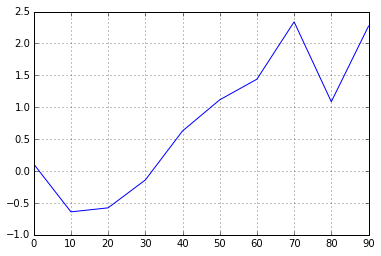

In [15]:
s = pd.Series(randn(10).cumsum(), index = np.arange(0, 100, 10))
s.plot()

Series 객체를 plot할 경우, index는 기본적으로 x축으로 쓰여진다. 이를 막기 위해서는 use_index = False 옵션을 이용하여 다른 x축을 사용할 수 있다. 

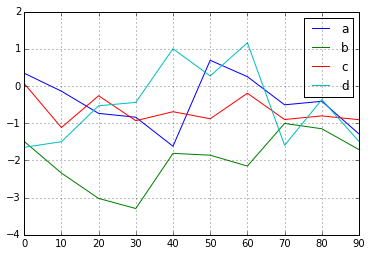

In [16]:
df = pd.DataFrame(randn(10, 4).cumsum(0), columns = ['a', 'b','c','d'], index = np.arange(0, 100, 10))
df.plot()

DataFrame을 plot할 경우, 하나의 subplot안에 모든 그래프를 그리고 자동으로 범례를 생성한다. 위 코드에서 그것을 확인할 수 있다. 

책에서는 Series.plot에서만 사용할 수 있는 옵션과 DataFrame에서만 할 수 있는 옵션에 대해서 다루고 있다. 시계열에 대한 케이스는 10절에서 나온다고 한다. 

###8.2.2 막대 그래프 

선 대신 막대 그래프를 그리기 위해서는 kind 옵션에서 bar이나  barh를 넘기면 된다. 이 경우 index는 x(bar)이나 y(barh)의 눈금으로 사용된다. 아래의 예를 보자. 

In [20]:
fig, axes = plt.subplots(2,1)
data = pd.Series(rand(16), index = list('abcdefghijklmnop'))

data.plot(kind = 'bar', ax = axes[0], alpha = 0.7)
data.plot(kind = 'barh', ax = axes[1], alpha = 0.7)

DataFrame에서 막대 그래프는 각 row들을 모아서 하나의 그룹으로 만들어서 보여준다. 아래 예제를 보자. 

genus가 아래 그래프에서 범례로 사용되었음을 알 수 있다.쌓인 막대 그래프는 stacked = True 옵션을 사용하여 확인할 수 있다. 각 row의 값이 하나의 막대에 쌓여서 출력된다. 아래 예제로 확인해 보자. 

In [21]:
df = pd.DataFrame(rand(6,4), index = [i+1 for i in range(6)], columns=pd.Index(['a','b','c','d'], name='Genus'))
fig, axes = plt.subplots(3,1)
df.plot(kind='bar', ax = axes[0])
df.plot(kind='barh', ax = axes[1])
df.plot(kind='barh', ax = axes[2], stacked = True)

아래 예제에서 stacked 옵션을 사용하면 편하게 통계의 양상을 알 수 있는 예를 살펴보자. 원래는 인터넷에서 긁어와야 하지만, 지금은 데이터 갯수가 얼마 되지 않아서 그냥 수동으로 기입하였다. 

In [22]:
party_counts = pd.DataFrame([[1,16,1,1,0,0], 
                             [2,53,18,13,1,0],
                             [0,39,15,18,3,1],
                             [1,48,4,5,1,3]],
                            index = pd.Index(['Fri', 'Sat', 'Sun', 'Thu'], name='day'), 
                            columns = pd.Index([i+1 for i in range(6)], name='size'))
party_counts
                            

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thu,1,48,4,5,1,3


In [23]:
party_counts = party_counts.ix[:, 2:5]

party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thu,0.827586,0.068966,0.086207,0.017241


In [24]:
party_pcts.plot(kind='bar', stacked=True)

###8.2.3 히스토그램과 밀도 그래프 
기본적으로 히스토그램과 밀도 그래프는 비슷한 걸 나타내나, 밀도 그래프는 연속함수를 plot한다. 책에서는 kde라는 방식으로 밀도 그래프를 생성한다. kde에 대해서는 다음 링크(http://en.wikipedia.org/wiki/Kernel_density_estimation)와 판서를 참고하자. (사실 그렇게 중요한 건 아니고 이런 식으로 연속확률분포를 얻어낸다는 것에 의미를 두자.)

일반적으로는 저 위키 링크에서처럼 히스토그램 위에 kde 그래프를 같이 그리게 된다.

In [25]:
comp1 = np.random.normal(0, 1, size=200) # N(0, 1)
comp2 = np.random.normal(10, 4, size=200) # N(10, 4)
values = pd.Series(np.concatenate([comp1, comp2]))
val1 = pd.Series(comp1 * 0.5)
val2 = pd.Series(comp2 * 0.5)

values.hist(bins=100, alpha=0.3, normed=True)
values.plot(kind='kde', style='k--')
val1.plot(kind='kde')
val2.plot(kind='kde')

###8.2.4 산포도
산포도는 2개의 1차원 데이터 사이의 상관관계를 찾을 때 유용하다. 아래의 예제를 참조하자. 

In [26]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()

trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [27]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title("changes in log scale")

변수가 많을 경우, 그들간의 분포도를 각자 그리는 것은 매우 귀찮은 과정이다. 이를 pandas의 scatter_matrix를 이용하여 해결할 수 있다. 아래의 예제를 보자. 

In [28]:
pd.scatter_matrix(trans_data, diagonal = 'kde',  alpha = 0.3)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0CA6EFB0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0ED27AB0>]], dtype=object)

In [29]:
trans_data['tbilrate'].plot(kind='kde')

## 8.3 지도 그리기 : 아이티 지진 데이터 시각화 

2010년에 수집된 아이티 지진 데이터를 시각화해 보자. 아래는 시각화 코드이다. 

In [ ]:
from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
    m = Basemap(ax = ax, 
                projection='stere', 
                lon_0 = (urlon + lllon)/2, 
                lat_0 = (urlat + lllat)/2, 
                llcrnrlat = lllat, urcrnrlat = urlat, 
                llcrnrlon = lllon, urcrnrlon = urlon, 
                resolution='f')
    m.drawcoastlines()
    m.drawstates()
    m.drawcontries()
    return m 
fig, axes = plt.subplots(1,1,1)
basic_haiti_map(ax = axes[0])